In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import StratifiedKFold
from random import seed
import seaborn as sns
import tensorflow
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Flatten
import keras.optimizers
from imblearn.over_sampling import SMOTE

In [80]:
data=pd.read_csv("data_set.csv")
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.412998,1491.688354,2075.824182,3184.355745,0.045976,-218.810582,122.234486,27.920799,23.722941,22.844499,...,6.255844,-2.542397,-0.917639,-4.774317,1.211038,-0.386343,1.133951,-1.452190,1.454535,happy
1,0.245947,1355.436173,1593.794832,2316.702658,0.079156,-303.857916,135.956505,1.837915,-4.874345,-19.611251,...,0.263212,-5.682631,-5.087810,-4.466399,1.721484,-3.062391,1.726126,-1.344901,1.373775,happy
2,0.288459,2780.992818,2734.300963,5996.347074,0.126230,-161.873294,68.848801,5.828112,11.746237,-9.119324,...,-4.743239,-10.335518,-4.159141,-13.455315,-3.056518,-1.854449,5.620204,5.784562,6.859507,happy
3,0.416686,1956.403155,2367.232773,4151.241565,0.082464,-232.575934,97.964434,50.036333,18.321141,10.174601,...,3.257361,-3.996707,-0.013201,-4.564516,-0.299851,-4.393319,0.554737,-0.721076,2.880039,happy
4,0.306054,899.636430,1409.779893,1665.939926,0.048648,-422.361991,166.701699,14.188575,34.022760,6.653825,...,4.226305,-3.073821,-0.164215,-3.138441,-0.325738,-6.829200,-2.746969,-4.609186,3.289205,happy


In [81]:
data.shape

(600, 26)

In [82]:
data.drop_duplicates(inplace=True)

## Splitting data into traning & testing

In [83]:
x=data.iloc[:,:25]
label=data.iloc[:,25]

In [85]:
smt=SMOTE()
xb,yb=smt.fit_resample(x,label)

In [86]:
le=LabelEncoder()
scaler=StandardScaler()

y=le.fit_transform(label)
X=scaler.fit_transform(x)

## Manual k-Fold Cross Validation

In [87]:
kfold = StratifiedKFold(n_splits=3)
cvscores = []
for train, test in kfold.split(X, y):
    model = Sequential()
    model.add(Dense(256, activation='relu', input_shape=(X[train].shape[1],)))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    
    model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    history=model.fit(X[train], y[train], epochs=100, batch_size=10)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 0.9224 - accuracy: 0.5445
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7986 - accuracy: 0.6260
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.7098 - accuracy: 0.6692
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6947 - accuracy: 0.6794
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6096 - accuracy: 0.7303
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5559 - accuracy: 0.7608
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5332 - accuracy: 0.7455
Epoch 8/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4573 - accuracy: 0.8041
Epoch 9/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4192 - accuracy: 0.8270
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3827 - accuracy: 0.8601
Epoch 11/

40/40 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9491
Epoch 84/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9517
Epoch 85/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0642 - accuracy: 0.9517
Epoch 86/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0681 - accuracy: 0.9440
Epoch 87/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9593
Epoch 88/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0614 - accuracy: 0.9593
Epoch 89/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0628 - accuracy: 0.9542
Epoch 90/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9517
Epoch 91/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0713 - accuracy: 0.9415
Epoch 92/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9542
Epoch 93/100


40/40 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9491
Epoch 66/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0673 - accuracy: 0.9644
Epoch 67/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9466
Epoch 68/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0712 - accuracy: 0.9517
Epoch 69/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9593
Epoch 70/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0613 - accuracy: 0.9517
Epoch 71/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9567
Epoch 72/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0764 - accuracy: 0.9567
Epoch 73/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8931
Epoch 74/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2317 - accuracy: 0.9109
Epoch 75/100


40/40 [==============================] - 0s 2ms/step - loss: 0.1482 - accuracy: 0.8985
Epoch 48/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.9137
Epoch 49/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1542 - accuracy: 0.8959
Epoch 50/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1550 - accuracy: 0.9036
Epoch 51/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9010
Epoch 52/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1463 - accuracy: 0.9010
Epoch 53/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9086
Epoch 54/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1440 - accuracy: 0.9162
Epoch 55/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9010
Epoch 56/100
40/40 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.8959
Epoch 57/100


In [88]:
predict_x=model.predict(X[test]) 
y_pred=np.argmax(predict_x,axis=1)

In [89]:
y_pred

array([0, 1, 2, 0, 1, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1,
       1, 0, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 0, 2, 1, 1, 2, 0, 2, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2,
       1, 2, 2, 0, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0, 2, 1, 2,
       0, 1, 0, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2,
       0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 2, 1],
      dtype=int64)

In [90]:
y[test]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

7/7 - 0s - loss: 2.3007 - accuracy: 0.5102 - 38ms/epoch - 5ms/step


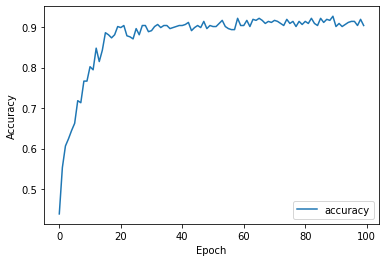

In [92]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X[test], y[test], verbose=2)

In [93]:
confusion_matrix(y[test],y_pred)

array([[28,  5, 32],
       [ 9, 41, 15],
       [24, 11, 31]], dtype=int64)

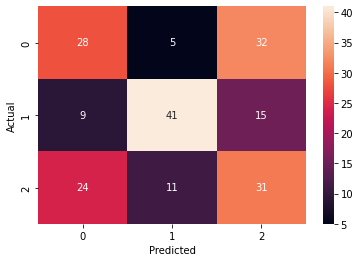

In [94]:
sns.heatmap(confusion_matrix(y[test],y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## save created model

In [ ]:
model.save('my_model.h5')

In [ ]:
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

# Randomly Train and Testing data split

In [95]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import tensorflow
from keras.models import Sequential
from keras.layers import InputLayer,Dense,Flatten
import keras.optimizers
from imblearn.over_sampling import SMOTE

In [96]:
data=pd.read_csv("data_set.csv")
data.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.412998,1491.688354,2075.824182,3184.355745,0.045976,-218.810582,122.234486,27.920799,23.722941,22.844499,...,6.255844,-2.542397,-0.917639,-4.774317,1.211038,-0.386343,1.133951,-1.452190,1.454535,happy
1,0.245947,1355.436173,1593.794832,2316.702658,0.079156,-303.857916,135.956505,1.837915,-4.874345,-19.611251,...,0.263212,-5.682631,-5.087810,-4.466399,1.721484,-3.062391,1.726126,-1.344901,1.373775,happy
2,0.288459,2780.992818,2734.300963,5996.347074,0.126230,-161.873294,68.848801,5.828112,11.746237,-9.119324,...,-4.743239,-10.335518,-4.159141,-13.455315,-3.056518,-1.854449,5.620204,5.784562,6.859507,happy
3,0.416686,1956.403155,2367.232773,4151.241565,0.082464,-232.575934,97.964434,50.036333,18.321141,10.174601,...,3.257361,-3.996707,-0.013201,-4.564516,-0.299851,-4.393319,0.554737,-0.721076,2.880039,happy
4,0.306054,899.636430,1409.779893,1665.939926,0.048648,-422.361991,166.701699,14.188575,34.022760,6.653825,...,4.226305,-3.073821,-0.164215,-3.138441,-0.325738,-6.829200,-2.746969,-4.609186,3.289205,happy


In [98]:
data.shape

(600, 26)

In [99]:
data.drop_duplicates(inplace=True)

In [100]:
x=data.iloc[:,:25]
label=data.iloc[:,25]

In [101]:
smt=SMOTE()
xb,yb=smt.fit_resample(x,label)

In [102]:
le=LabelEncoder()
scaler=StandardScaler()

y=le.fit_transform(label)
X=scaler.fit_transform(x)

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [104]:
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [105]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 256)               6656      
                                                                 
 dense_97 (Dense)            (None, 128)               32896     
                                                                 
 dense_98 (Dense)            (None, 64)                8256      
                                                                 
 dense_99 (Dense)            (None, 3)                 195       
                                                                 
Total params: 48,003
Trainable params: 48,003
Non-trainable params: 0
_________________________________________________________________


In [106]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [107]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=128)

Epoch 1/100
4/4 [==============================] - 1s 57ms/step - loss: 1.0519 - accuracy: 0.4788 - val_loss: 0.9784 - val_accuracy: 0.4746
Epoch 2/100
4/4 [==============================] - 0s 11ms/step - loss: 0.9098 - accuracy: 0.5572 - val_loss: 0.9498 - val_accuracy: 0.4915
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.8627 - accuracy: 0.5826 - val_loss: 0.9635 - val_accuracy: 0.5339
Epoch 4/100
4/4 [==============================] - 0s 11ms/step - loss: 0.8280 - accuracy: 0.6059 - val_loss: 0.9642 - val_accuracy: 0.5508
Epoch 5/100
4/4 [==============================] - 0s 14ms/step - loss: 0.7960 - accuracy: 0.6419 - val_loss: 0.9659 - val_accuracy: 0.5339
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7656 - accuracy: 0.6525 - val_loss: 0.9802 - val_accuracy: 0.5424
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.7373 - accuracy: 0.6737 - val_loss: 0.9955 - val_accuracy: 0.5000
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 12ms/step - loss: 0.0801 - accuracy: 0.9661 - val_loss: 2.7295 - val_accuracy: 0.4237
Epoch 60/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0936 - accuracy: 0.9555 - val_loss: 2.8564 - val_accuracy: 0.4322
Epoch 61/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0816 - accuracy: 0.9576 - val_loss: 2.8647 - val_accuracy: 0.3983
Epoch 62/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0831 - accuracy: 0.9576 - val_loss: 2.8918 - val_accuracy: 0.4237
Epoch 63/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0750 - accuracy: 0.9619 - val_loss: 2.9144 - val_accuracy: 0.4407
Epoch 64/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0813 - accuracy: 0.9597 - val_loss: 2.8367 - val_accuracy: 0.4322
Epoch 65/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0897 - accuracy: 0.9640 - val_loss: 2.9481 - val_accuracy: 0.4153
Epoch 66/100
4/4 [========

In [108]:
predict_x=model.predict(X_test) 
y_pred=np.argmax(predict_x,axis=1)

4/4 - 0s - loss: 3.4424 - accuracy: 0.3983 - 14ms/epoch - 4ms/step


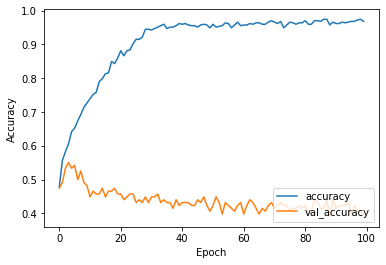

In [109]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

In [110]:
confusion_matrix(y_test,y_pred)

array([[10, 12, 18],
       [ 9, 24, 12],
       [16,  4, 13]], dtype=int64)

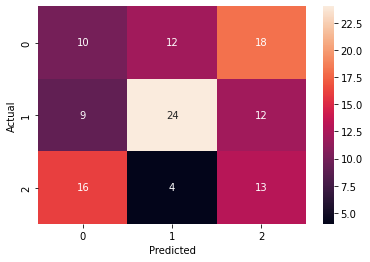

In [111]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()